# Proyek Analisis Data: Bike-Sharing
- **Nama:** Muhammad Apriliansyah
- **Email:** mhmdarpiansyah36@gmail.com


## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah penyewa antara tahun 2011 dan 2012?
- Bagaimana perbandingan penyewaan sepeda berdasarkan musim?
- Bagaimana perbandingan penyewaan sepeda berdasarkan hari?

## Import Semua Packages/Library yang Digunakan

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [177]:
# Memuat dataset day.csv
day_df = pd.read_csv("data/day.csv")

# Menampilkan 3 baris pertama dataset
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [178]:
# Memuat dataset hour.csv
hour_df = pd.read_csv("data/hour.csv")

# Menampilkan 3 baris pertama dataset
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Assessing Data

####Data Day

In [179]:
# memeriksa tipe data dari data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa informasi kolom dan tipe data dari data day

In [180]:
# mengecek keberadaan missing value di data day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Melakukan check missing value pada data

In [181]:
# memeriksa duplikasi data day
print("Duplikasi: ", day_df.duplicated().sum())

Duplikasi:  0


Melakukan check duplikasi data

####Data Hour

In [182]:
# memeriksa tipe data dari data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa informasi kolom dan tipe data dari data hour

In [183]:
# mengecek keberadaan missing value di data hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Melakukan check missing value pada data

In [184]:
# memeriksa duplikasi data hour
print("Duplikasi: ", hour_df.duplicated().sum())

Duplikasi:  0


Melakukan check duplikasi data

### Cleaning Data

#### Data Day

####Rename column name

Menyesuaikan penamaan kolom pada data day
- "dteday" diubah menjadi "dateday"
- "mnth" diubah menjadi "month"
- "yr" diubah menjadi "year"
- "weathersit" diubah menjadi "weather_category"
- "hum" diubah menjadi "humidity"
- "cnt" diubah menjadi "count"

In [185]:
# Menyesuaikam nama kolom pada data day
day_df.rename(columns={
    "dteday": "dateday",
    "mnth": "month",
    "yr": "year",
    "weathersit": "weather_category",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)

# Menampilkan 3 baris pertama dataset
day_df.head(3)

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_category,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


#### Delete unused column

Menghapus kolom yang tidak digunakan pada data day

In [186]:
# Menghapus kolom instant pada data day
drop_col = ["instant"]

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

# Menampilkan 3 baris pertama dataset
day_df.head(3)


,dateday,season,year,month,holiday,weekday,workingday,weather_category,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


####Convert numeric values to category labels

Manual Grouping pada Dataset Bike Sharing
Kode ini melakukan Manual Grouping dengan mengganti nilai numerik dalam dataset menjadi kategori yang lebih mudah dipahami.

In [187]:
# Merubah tahun
day_df["year"] = day_df["year"].map({
    0: "2011", 1: "2012"
})

# Merubah bulan
day_df["month"] = day_df["month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

# Merubah hari
day_df["weekday"] = day_df["weekday"].map({
    0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
})

# Merubah hari kerja
day_df["workingday"] = day_df["workingday"].map({
    0: "Non-Working Day", 1: "Working Day"
})

# Merubah hari libur
day_df["holiday"] = day_df["holiday"].map({
    0: "Non-Holiday", 1: "Holiday"
})

# Merubah cuaca
day_df["weather_category"] = day_df["weather_category"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow/Fog"
})

#### Convert datatype

Melakukan penyesuaian tipe data pada data day dengan melakukan kategori kepada data yang mempunyai beberapa kategori dan menyesuaikan data dateday sebagai tipe data datetime

In [188]:
# Mengonversi kolom 'dateday' menjadi format datetime
day_df["dateday"] = pd.to_datetime(day_df["dateday"])

# Mengonversi kolom numerik menjadi tipe kategori
day_df["year"] = day_df["year"].astype("category")
day_df["month"] = day_df["month"].astype("category")
day_df["season"] = day_df["season"].astype("category")
day_df["weekday"] = day_df["weekday"].astype("category")
day_df["holiday"] = day_df["holiday"].astype("category")
day_df["workingday"] = day_df["workingday"].astype("category")
day_df["weather_category"] = day_df["weather_category"].astype("category")

# Menampilkan 3 baris pertama dataset setelah perubahan
day_df.head(3)


,dateday,season,year,month,holiday,weekday,workingday,weather_category,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,2011,Jan,Non-Holiday,Sat,Non-Working Day,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,2011,Jan,Non-Holiday,Sun,Non-Working Day,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,2011,Jan,Non-Holiday,Mon,Working Day,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [189]:
# menampilkan tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateday           731 non-null    datetime64[ns]
 1   season            731 non-null    category      
 2   year              731 non-null    category      
 3   month             731 non-null    category      
 4   holiday           731 non-null    category      
 5   weekday           731 non-null    category      
 6   workingday        731 non-null    category      
 7   weather_category  731 non-null    category      
 8   temp              731 non-null    float64       
 9   atemp             731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual            731 non-null    int64         
 13  registered        731 non-null    int64         
 14  count             731 non-

## Exploratory Data Analysis (EDA)

#### Perbandingan Tahun 2011 dan 2012

In [190]:
# Melakukan agregasi berdasarkan tahun untuk menghitung jumlah total penyewaan
annual_result = day_df.groupby(by="year", observed=False).agg({
    "registered": ["sum","max","min"],
    "casual": ["sum","max","min"],
    "count": ["sum"]
})

# Menampilkan hasil
annual_result


registered             casual              count
            sum   max  min     sum   max min      sum
year                                                 
2011     995851  4614  416  247252  3065   9  1243103
2012    1676811  6946   20  372765  3410   2  2049576

Tabel menunjukkan jumlah penyewaan untuk setiap tahun mengenai total jumlah penyewaan sepeda untuk setiap tahun, selain itu juga memperlihatkan perbandingan penyewa registered dan penyewa casual. Selain itu, data menunjukkan peningkatan dalam penyewaan sepeda pada tahun 2012 dibandingkan dengan 2011.

In [191]:
# Melakukan agregasi untuk kolom "count" berdasarkan "year" dan "month"
result = day_df.groupby(by=["year", "month"], observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})

# Memperjelas nama kolom
result.columns = ["count_max", "count_min", "count_mean", "count_sum"]

# Binning berdasarkan total peminjaman (count_sum)
bin_edges = np.linspace(result["count_sum"].min(), result["count_sum"].max(), num=6)
bin_labels = ["Very Low", "Low", "Medium", "High", "Very High"]
result["count_intensity"] = pd.cut(result["count_sum"], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Mengurutkan hasil berdasarkan "count_sum" secara menurun
result_sorted = result.sort_values(by="count_sum", ascending=False)

# Menampilkan hasil yang sudah diurutkan
result_sorted


count_max  count_min   count_mean  count_sum count_intensity
year month                                                              
2012 Sep         8714       4073  7285.766667     218573       Very High
     Aug         7865       4549  6919.451613     214503       Very High
     Jul         8173       4459  6567.967742     203607       Very High
     Jun         8120       4127  6761.000000     202830       Very High
     Oct         8156         22  6414.225806     198841       Very High
     May         8294       2843  6318.225806     195865       Very High
     Apr         7460       1027  5807.466667     174224            High
     Mar         8362       3194  5318.548387     164875            High
     Nov         6852       2277  5088.800000     152664            High
2011 Jun         5515       3767  4783.733333     143512          Medium
     Jul         6043       3285  4559.387097     141341          Medium
     Aug         5895       1115  4409.387097     136691          Medium
     May         5805       2633  4381.322581     135821          Medium
     Sep         5423       1842  4247.266667     127418          Medium
2012 Dec         6606        441  3990.741935     123713          Medium
2011 Oct         5511        627  3984.225806     123511          Medium
2012 Feb         5062       1529  3556.448276     103137             Low
2011 Nov         4486       1495  3405.566667     102167             Low
2012 Jan         4521       1301  3120.774194      96744             Low
2011 Apr         5312        795  3162.333333      94870             Low
     Dec         3940        705  2816.870968      87323             Low
     Mar         3239        605  2065.967742      64045        Very Low
     Feb         2927       1005  1721.964286      48215        Very Low
     Jan         1985        431  1231.903226      38189        Very Low



> Melakukan Binning dengan membuat 5 interval antara nilai minimum dan maksimum dari count_sum.
Kategori yang digunakan:

* "Very Low"
* "Low"
* "Medium"
* "High"
* "Very High"




Jumlah total penyewaan sepeda tertinggi dan terenda pada setiap tahun jika dilihat dari bulan dan jumlah penyewaan dalam satu hari. Data pada tabel menunjukan bahwa 2012 mempunyai jumlah penyewaan terbanyak per bulan.


In [192]:
# Manual Grouping berdasarkan musim dan tahun
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
day_df['season_group'] = day_df['season'].map(season_mapping)

# Mengelompokkan berdasarkan tahun dan musim
seasonal_year_counts = day_df.groupby(['year', 'season_group'], observed=False)['count'].sum().reset_index()

# Konversi season_group ke kategori untuk memastikan urutan yang benar
seasonal_year_counts['season_group'] = pd.Categorical(seasonal_year_counts['season_group'])

## Binning berdasarkan jumlah peminjaman
bin_edges = np.linspace(seasonal_year_counts['count'].min(), seasonal_year_counts['count'].max(), num=6)
bin_labels = ['Very Low','Low', 'Medium', 'High', 'Very High']
seasonal_year_counts['count_group'] = pd.cut(seasonal_year_counts['count'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Memperjelas nama kolom
seasonal_year_counts.columns = ["Tahun", "Season", "Jumlah Peminjaman", "Intensitas Peminjaman"]

# Menampilkan hasil
print(seasonal_year_counts)

  Tahun  Season  Jumlah Peminjaman Intensitas Peminjaman
0  2011  Winter             150000              Very Low
1  2011  Spring             347316                Medium
2  2011  Summer             419650                Medium
3  2011    Fall             326137                   Low
4  2012  Winter             321348                   Low
5  2012  Spring             571273             Very High
6  2012  Summer             641479             Very High
7  2012    Fall             515476                  High




> Saya akan membuat metode clustering menggunakan Manual Grouping dan Binning dengan


*   Mengelompokkan musim (season) menjadi Winter, Spring, Summer, dan Fall.
*   Melakukan binning pada jumlah peminjaman (count) menjadi Very Low, Low, Medium, High, dan Very High.





Data pada tabel menunjukan jumlah penyewa berdasarkan tahun dan musim dengan masing-masing tahun menunjukan musim gugur sebagai musim dengan jumlah penyewa terbanyak.

In [193]:
# Mengelompokkan berdasarkan tahun hari
weekday_comparison = day_df.groupby(["year", "weekday"], observed=False).agg({
    "count": ["sum", "mean"]
}).reset_index()

# Memperjelas nama kolom
weekday_comparison.columns = ["year", "weekday", "sum", "mean"]

# Menampilkan hasil
weekday_comparison


,year,weekday,sum,mean
0,2011,Fri,182006,3500.115385
1,2011,Mon,180221,3465.788462
2,2011,Sat,179743,3391.377358
3,2011,Sun,177074,3405.269231
4,2011,Thu,174552,3356.769231
5,2011,Tue,180338,3468.038462
6,2011,Wed,169169,3253.250000
7,2012,Fri,305784,5880.461538
8,2012,Mon,275282,5194.000000
9,2012,Sat,298064,5732.000000


Tabel menunjukan hari dengan jumlah penyewaan terbanyak untuk setiap tahun

In [194]:
# Mengelompokkan berdasarkan tahun dan status hari kerja
workingday_comparison = day_df.groupby(["year", "workingday"], observed=False).agg({
    "count": ["sum"]
}).reset_index()

# Memperjelas nama kolom
workingday_comparison.columns = ["year", "workingday", "sum"]

# Menampilkan hasil
workingday_comparison



,year,workingday,sum
0,2011,Non-Working Day,386839
1,2011,Working Day,856264
2,2012,Non-Working Day,613430
3,2012,Working Day,1436146


Tabel menunjukan bahwa Working Day memiliki jumlah penyewaan yang lebih bantak dibandingkan dengan Non-Working Day

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah penyewa antara tahun 2011 dan 2012?

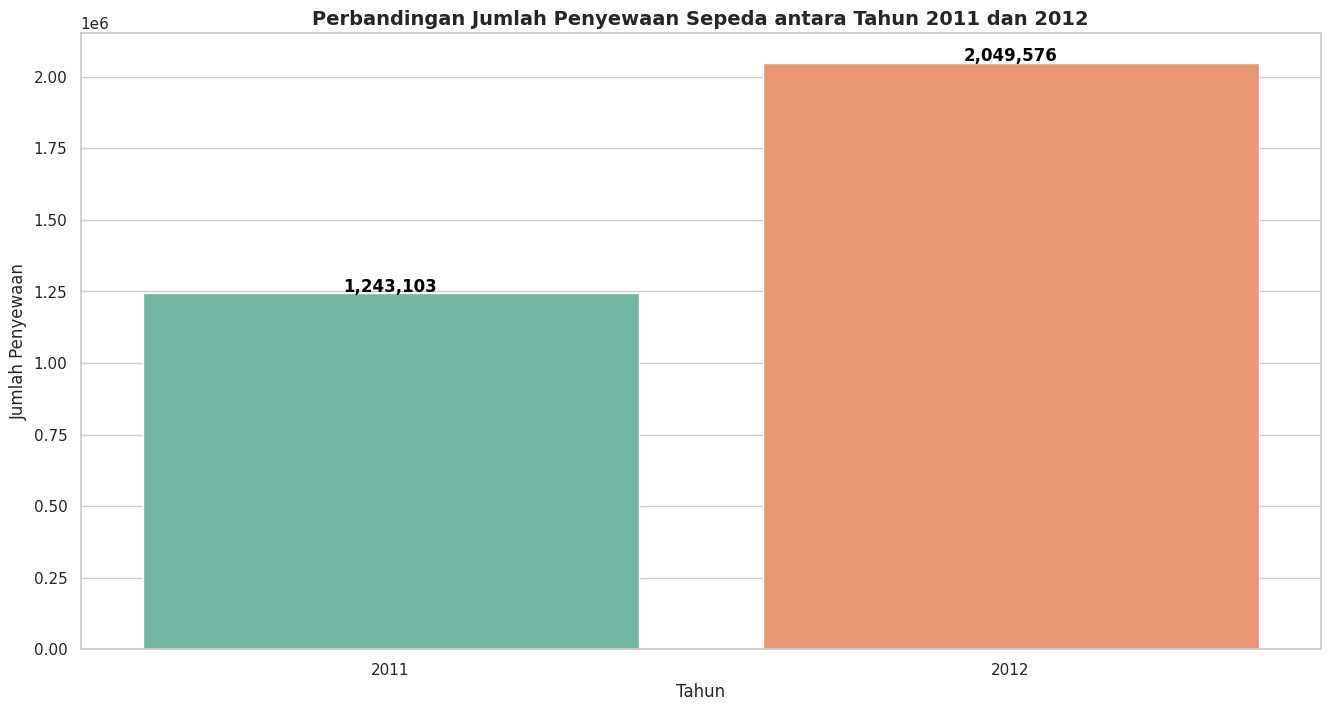

In [195]:
# Menghitung total penyewaan berdasarkan tahun dengan parameter observed=False
yearly_counts = day_df.groupby("year", observed=False)["count"].sum().reset_index()

# Set tema visualisasi
sns.set_theme(style="whitegrid")

# Membuat figure untuk grafik batang
plt.figure(figsize=(16, 8))

# Membuat barplot untuk membandingkan total penyewaan per tahun
ax = sns.barplot(
    data=yearly_counts,
    x="year",
    y="count",
    hue="year",
    palette="Set2"
)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=12, color='black', fontweight='bold',
        xytext=(0, 5), textcoords='offset points'
    )

# Menambahkan label dan judul
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.title("Perbandingan Jumlah Penyewaan Sepeda antara Tahun 2011 dan 2012", fontsize=14, fontweight="bold")


# Menampilkan grafik
plt.show()


Perbandingan menunjukan bahwa tahun 2012 merupakan tahun dengan penyewaan terbanyak dibandingkan dengan tahun 2011. Dengan perbandingan total penyewaan pada tahun 2011 sebanyak 1,243,103 dan pada tahun 2,049,576 pada tahun 2012.

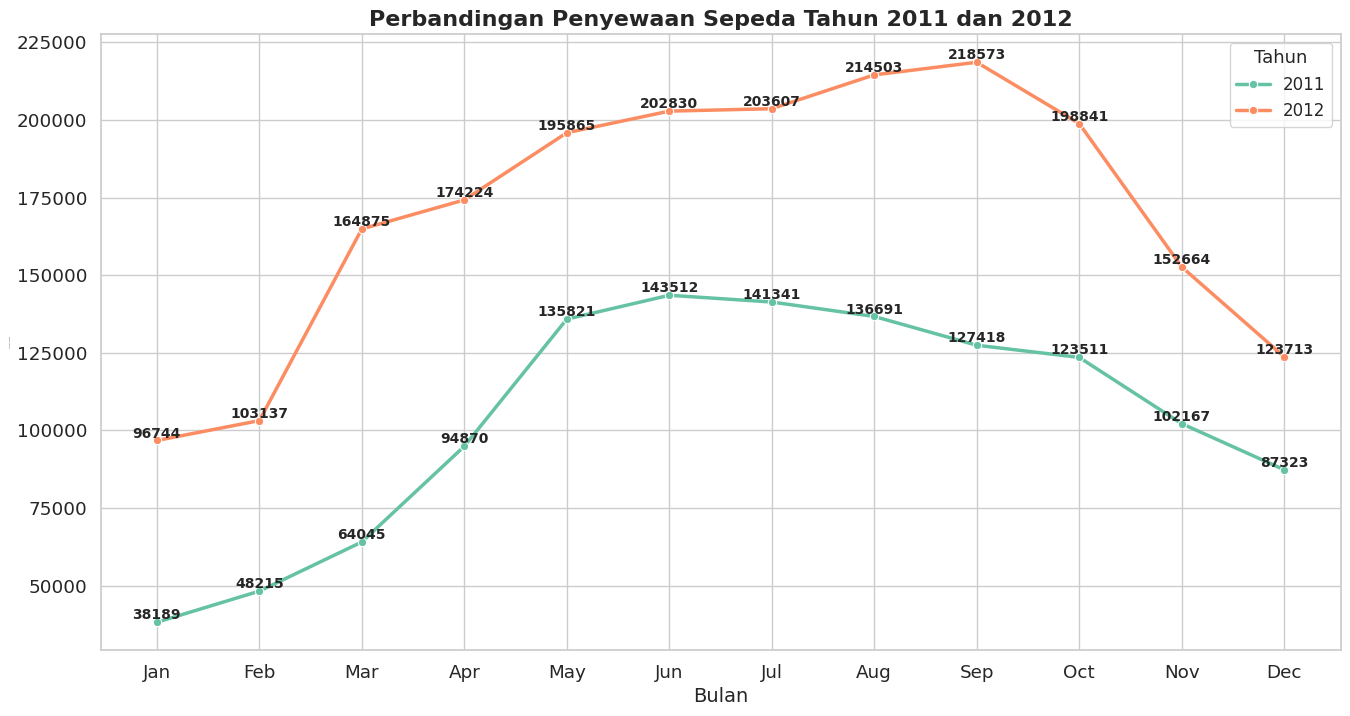

In [196]:
# Pastikan data memiliki kategori yang berurutan untuk bulan
day_df["month"] = pd.Categorical(day_df["month"], categories=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], ordered=True)

# Mengelompokkan data berdasarkan tahun dan bulan
monthly_counts = day_df.groupby(by=["year", "month"], observed = False).agg({
    "count": "sum"
}).reset_index()

# Mengatur gaya visualisasi
sns.set_theme(style="whitegrid", font_scale=1.2)

# Membuat figure
plt.figure(figsize=(16, 8))
ax = sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="Set2",
    marker="o",
    linewidth=2.5
)

# Menambahkan label pada setiap titik data
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f"{int(y)}", ha="center", va="bottom", fontsize=10, fontweight="bold")

# Menambahkan judul dan label sumbu
plt.title("Perbandingan Penyewaan Sepeda Tahun 2011 dan 2012", fontsize=16, fontweight="bold")
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Total Penyewaan", fontsize=1)
plt.legend(title="Tahun", loc="upper right", fontsize=12, title_fontsize=13)

# Menampilkan plot
plt.show()

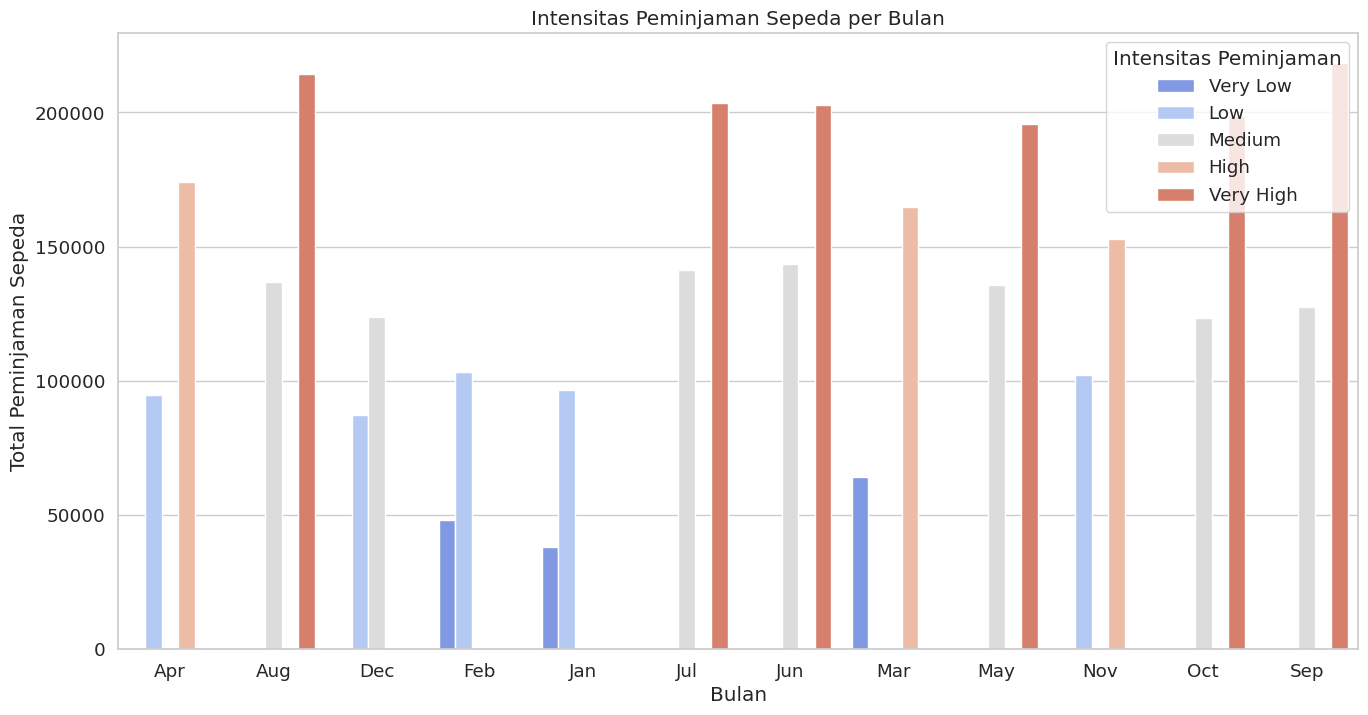

In [209]:
# Visualisasi intensitas peminjaman
plt.figure(figsize=(16, 8))
sns.barplot(data=result_sorted.reset_index(), x='month', y='count_sum', hue='count_intensity', palette='coolwarm')
plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Intensitas Peminjaman Sepeda per Bulan")
plt.legend(title="Intensitas Peminjaman")
plt.show()

Berdasarkan hasil analisis data hasil perbandingan penyewaann sepeda tahun 2011 dan 2012 adalah:
- Bulan ***September 2012*** memiliki total penyewaan tertinggi 218,573.
- Bulan ***Januari 2012*** memiliki jumlah penyewaan terendah 96,744.

- Bulan ***Juni 2011*** memiliki total penyewaan tertinggi 143,512.
- Bulan ***Januari 2011*** memiliki jumlah penyewaan terendah 38,189.

### Pertanyaan 2: Bagaimana perbandingan penyewaan sepeda berdasarkan musim?

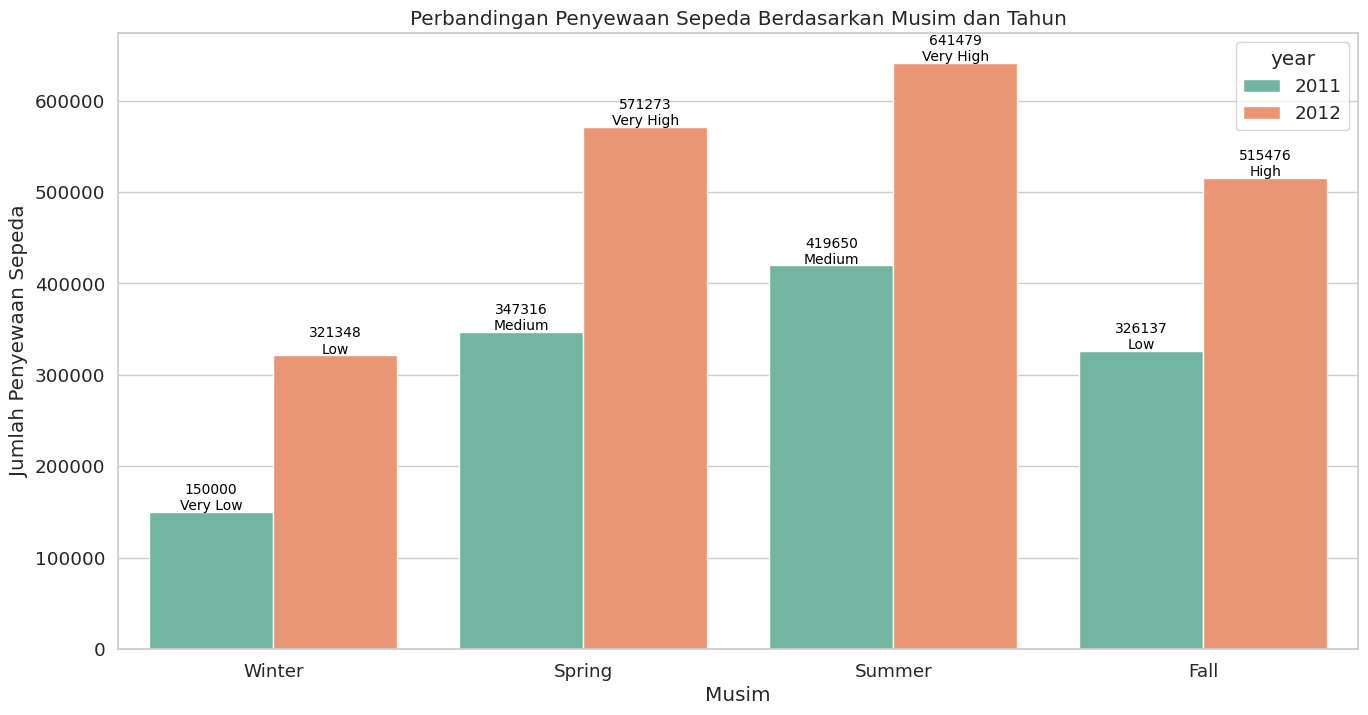

In [198]:
seasonal_year_counts = day_df.groupby(by=["year", "season_group"], observed=False).agg({
    "count": "sum"
}).reset_index()

# Menggabungkan dengan intensitas peminjaman
seasonal_year_counts['count_group'] = pd.cut(seasonal_year_counts['count'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Membuat plot dengan ukuran yang sesuai
plt.figure(figsize=(16, 8))

# Membuat grafik batang terkelompok berdasarkan musim dan tahun
ax = sns.barplot(data=seasonal_year_counts, x='season_group', y='count', hue='year', palette="Set2")

# Menambahkan label dan judul
plt.title("Perbandingan Penyewaan Sepeda Berdasarkan Musim dan Tahun")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")

# Menambahkan jumlah total & intensitas pada setiap batang
for p, intensity in zip(ax.patches, seasonal_year_counts['count_group']):
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}\n{intensity}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center',
                           fontsize=10, color='black',
                           xytext=(0, 10), textcoords='offset points')

# Menampilkan grafik
plt.show()

Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi pada kedua tahun, dengan 641.479 penyewaan pada 2012 dan 419.650 pada 2011. Musim Semi (Spring) memiliki jumlah penyewaan terendah, tetapi meningkat dari 150.000 (2011) menjadi 321.348 (2012).



### Pertanyaan 3: Bagaimana perbandingan penyewaan sepeda berdasarkan hari?

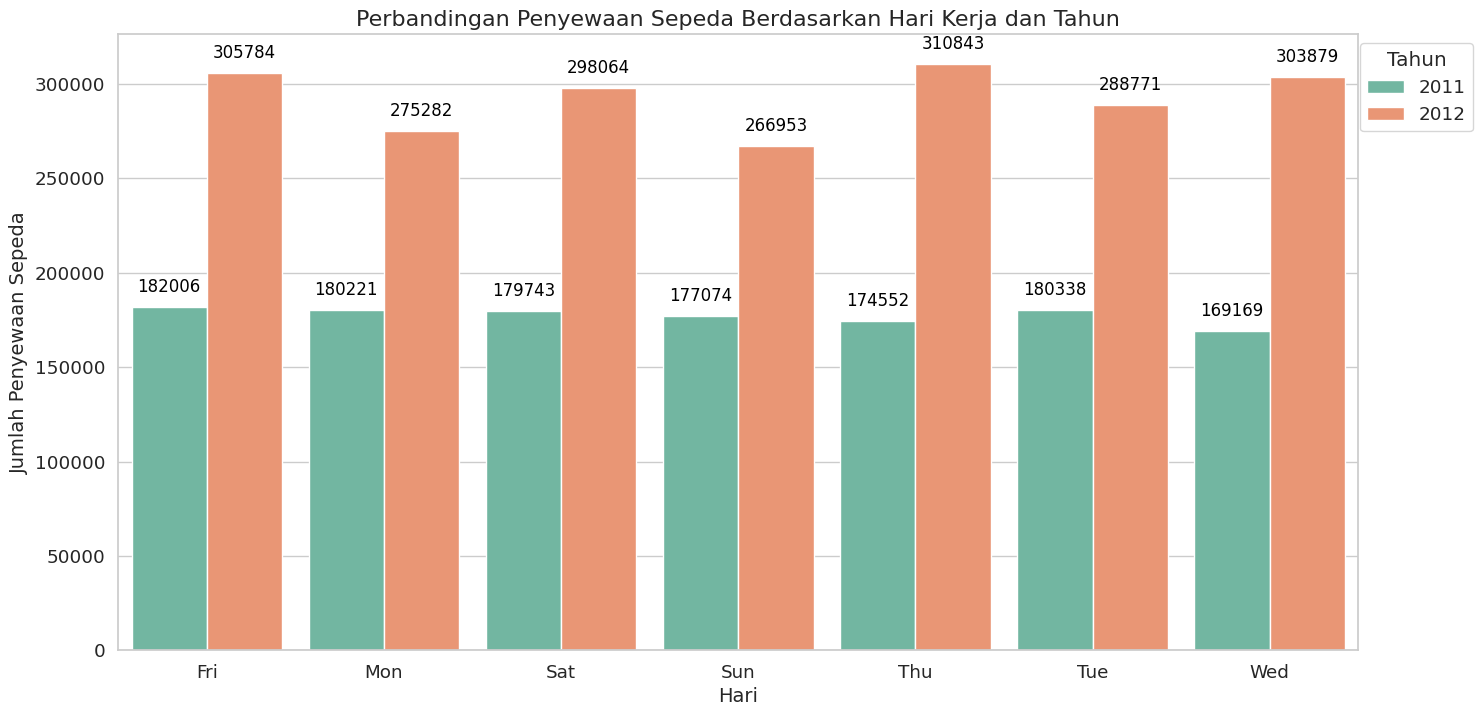

In [201]:
# Membuat plot dengan ukuran lebih besar
plt.figure(figsize=(16, 8))

# Membuat grafik batang dengan batang lebih lebar
sns.barplot(data=weekday_comparison, x="weekday", y="sum", hue="year", palette="Set2", width=0.85, dodge=True)

# Menambahkan label dan judul
plt.title("Perbandingan Penyewaan Sepeda Berdasarkan Hari Kerja dan Tahun", fontsize=16)
plt.xlabel("Hari", fontsize=14)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=14)

# Menampilkan jumlah total di atas setiap batang, kecuali jika nilainya nol
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom',
                           fontsize=12, color='black',
                           xytext=(0, 8), textcoords='offset points')

# Menyesuaikan posisi legenda agar berada di luar dan tidak menumpuk
plt.legend(title="Tahun", loc="upper right", bbox_to_anchor=(1.10, 1))

# Menampilkan grafik
plt.show()



Bagan menunjukkan hari dengan jumlah penyewaan sepeda terbanyak untuk setiap tahun. Pada tahun 2011, hari dengan jumlah penyewaan tertinggi adalah Friday dengan 182.006 penyewaan, sedangkan pada tahun 2012, hari dengan penyewaan terbanyak adalah Thursday dengan 310.843 penyewaan.

Sebaliknya, hari dengan jumlah penyewaan terendah pada tahun 2011 adalah Wednesday dengan 169.169 penyewaan, sementara pada tahun 2012, hari dengan penyewaan paling sedikit adalah Sunday dengan 266.953 penyewaan.

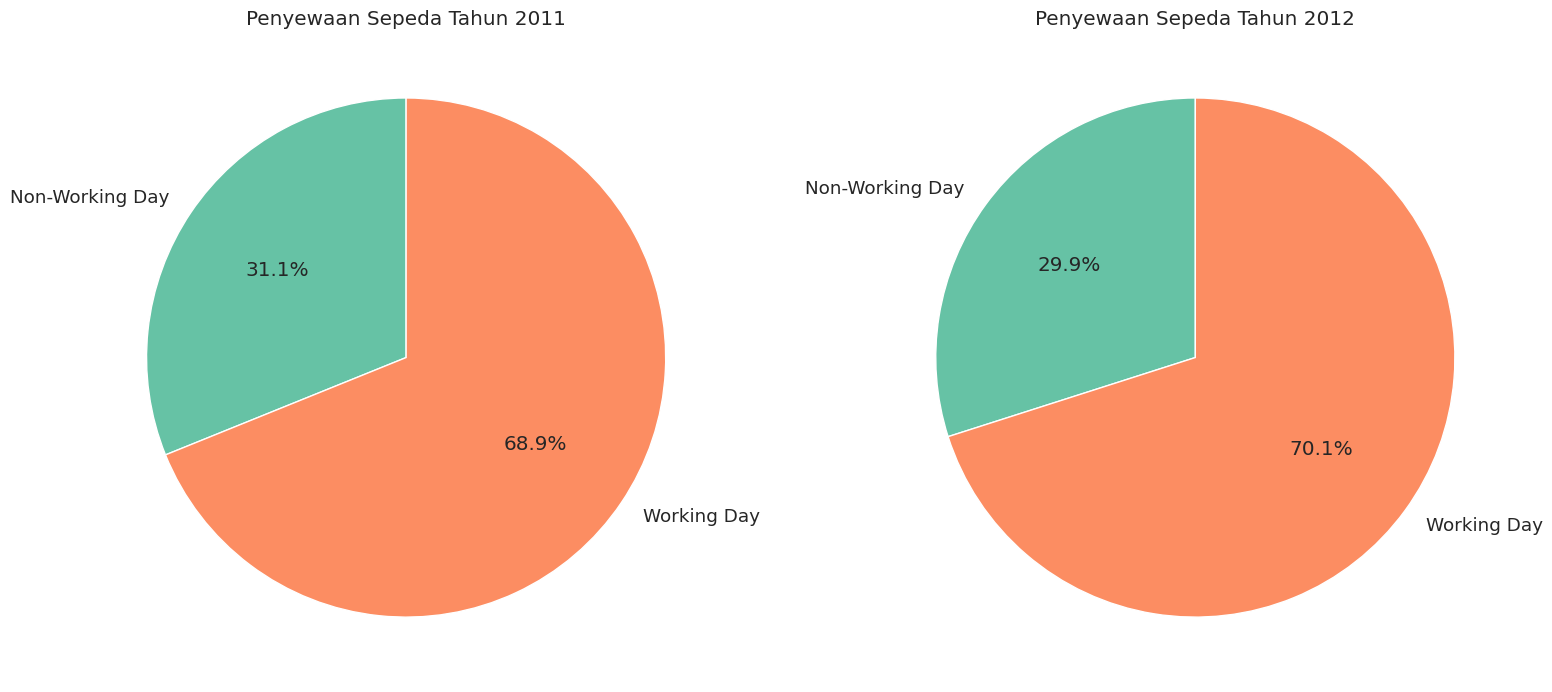

In [202]:
# Label untuk diagram lingkaran
workingday_labels = ["Non-Working Day", "Working Day"]
colors = ["#66c2a5", "#fc8d62"]

# Membuat plot dengan ukuran yang sesuai
plt.figure(figsize=(16, 8))

# Loop untuk membuat pie chart per tahun
for year in workingday_comparison["year"].unique():
    # Memfilter data berdasarkan tahun tertentu
    data_year = workingday_comparison[workingday_comparison["year"] == year]

    # Membuat subplot untuk setiap tahun
    plt.subplot(1, 2, list(workingday_comparison["year"].unique()).index(year) + 1)
    plt.pie(data_year["sum"], labels=workingday_labels, autopct='%1.1f%%', colors=colors, startangle=90)

    # Menambahkan judul setiap pie chart
    plt.title(f"Penyewaan Sepeda Tahun {year}")

# Menampilkan diagram lingkaran
plt.tight_layout()
plt.show()

Menunjukkan perbandingan penyewaan sepeda berdasarkan hari kerja (Working Day) dan hari libur/akhir pekan (Non-Working Day) untuk tahun 2011 dan 2012.

Tahun 2011:

- Sebagian besar penyewaan sepeda terjadi pada hari kerja (68,9%).
- Penyewaan pada hari libur atau akhir pekan hanya sebesar 31,1%.

Tahun 2012:

- 70,1% penyewaan terjadi pada hari kerja.
- Penyewaan pada hari libur atau akhir pekan sedikit lebih rendah dibanding tahun 2011, yaitu 29,9%.









## Conclusion

- **Conclution pertanyaan 1**: Tahun 2012 mengalami peningkatan signifikan dalam jumlah penyewaan sepeda dibandingkan dengan tahun 2011. Total penyewaan pada tahun 2012 mencapai 2.049.576, lebih tinggi dibandingkan tahun 2011 yang hanya 1.243.103. Bulan dengan jumlah penyewaan tertinggi adalah September 2012 (218.573), sementara bulan dengan penyewaan terendah adalah Januari 2011 (38.189). Hal ini menunjukkan tren peningkatan penggunaan sepeda dari tahun ke tahun.

- **Conclution pertanyaan 2**: Penyewaan sepeda mengalami peningkatan pada semua musim di tahun 2012 dibandingkan dengan 2011. Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi pada kedua tahun, menunjukkan tren peningkatan penggunaan sepeda pada musim tersebut. Musim Semi (Spring) memiliki jumlah penyewaan terendah, namun terjadi peningkatan signifikan dari 150.000 di tahun 2011 menjadi 321.348 di tahun 2012. Hal ini menunjukkan bahwa minat masyarakat dalam menyewa sepeda meningkat di semua musim, terutama pada tahun 2012

- **Conclution pertanyaan 3**:Penyewaan sepeda lebih tinggi pada hari kerja (Working Day) dibandingkan hari libur atau akhir pekan (Non-Working Day), dengan 68,9% penyewaan terjadi pada hari kerja (Working Day) di tahun 2011 dan meningkat menjadi 70,1% di tahun 2012. Hari dengan jumlah penyewaan tertinggi pada tahun 2011 adalah Jumat dengan 182.006 penyewaan, sedangkan pada tahun 2012, jumlah penyewaan tertinggi terjadi pada hari Kamis dengan 310.843 penyewaan. Sebaliknya, hari dengan jumlah penyewaan terendah pada tahun 2011 adalah Rabu dengan 169.169 penyewaan, sementara pada tahun 2012, hari dengan penyewaan paling sedikit adalah Minggu dengan 266.953 penyewaan. Secara keseluruhan, terdapat tren peningkatan penyewaan sepeda dari tahun 2011 ke 2012, terutama pada hari kerja (Working Day).
